In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dogo.wasserstein.wasserstein_distance import experiment_collection_distances

In [3]:
def display_distances(experiments_dict, mean_arr, std_arr, shape=(2,2)):
    fig, ax = plt.subplots(*shape, figsize=(shape[0]*10,shape[1]*10))

    datasets = list(experiments_dict.keys())
    for i in range(len(datasets)):
        wd_vals_arr = mean_arr[i,:,:]
        mat = ax[i//2, i%2].matshow(wd_vals_arr)
        ax[i//2, i%2].set_xticks(range(len(datasets)))
        ax[i//2, i%2].set_yticks(range(len(datasets)))
        ax[i//2, i%2].set_xticklabels(datasets, rotation=45)
        ax[i//2, i%2].set_yticklabels(datasets, rotation=45)

        for (j,k), z in np.ndenumerate(wd_vals_arr):
            if z != 0:
                ax[i//2, i%2].text(k, j, '{:.2f}±{:.2f}'.format(mean_arr[i,j,k], std_arr[i,j,k]), ha="center", va="center", color='w' if z < 10 else 'k')

        ax[i//2, i%2].set_title(datasets[i])

# D3RLPY

In [4]:
d3rlpy_01_experiments = {
    "D3RLPY-RT-0.1M-1-P0_100000" : ['MP449', 'MP450', 'MP451'],
    "D3RLPY-RT-0.2M-1-P0_100000" : ['MP452', 'MP453', 'MP454'],
    "D3RLPY-RT-0.5M-1-P0_100000" : ['MP455', 'MP456', 'MP457'],
    "D3RLPY-RT-1M-1-P0_100000"   : ['MP458', 'MP459', 'MP460'],
    "D3RLPY-RT-2M-1-P0_100000"   : ['MP533', 'MP534', 'MP535'],
}

In [5]:
d3rlpy_01_wd_mean, d3rlpy_01_wd_std = experiment_collection_distances(d3rlpy_01_experiments)

In [6]:
display_distances(d3rlpy_experiments, d3rlpy_wd_mean, d3rlpy_wd_std, shape=(3,2))

NameError: name 'd3rlpy_experiments' is not defined

In [ ]:
d3rlpy_1_experiments = {
    "D3RLPY-RT-0.1M-1-P0_100000" : ['MP497', 'MP498', 'MP499'],
    "D3RLPY-RT-0.2M-1-P0_100000" : ['MP500', 'MP501', 'MP502'],
    "D3RLPY-RT-0.5M-1-P0_100000" : ['MP503', 'MP504', 'MP505'],
    "D3RLPY-RT-1M-1-P0_100000"   : ['MP506', 'MP507', 'MP508'],
    "D3RLPY-RT-2M-1-P0_100000"   : ['MP539', 'MP540', 'MP541'],
}

In [ ]:
d3rlpy_1_wd_mean, d3rlpy_1_wd_std = experiment_collection_distances(d3rlpy_1_experiments)

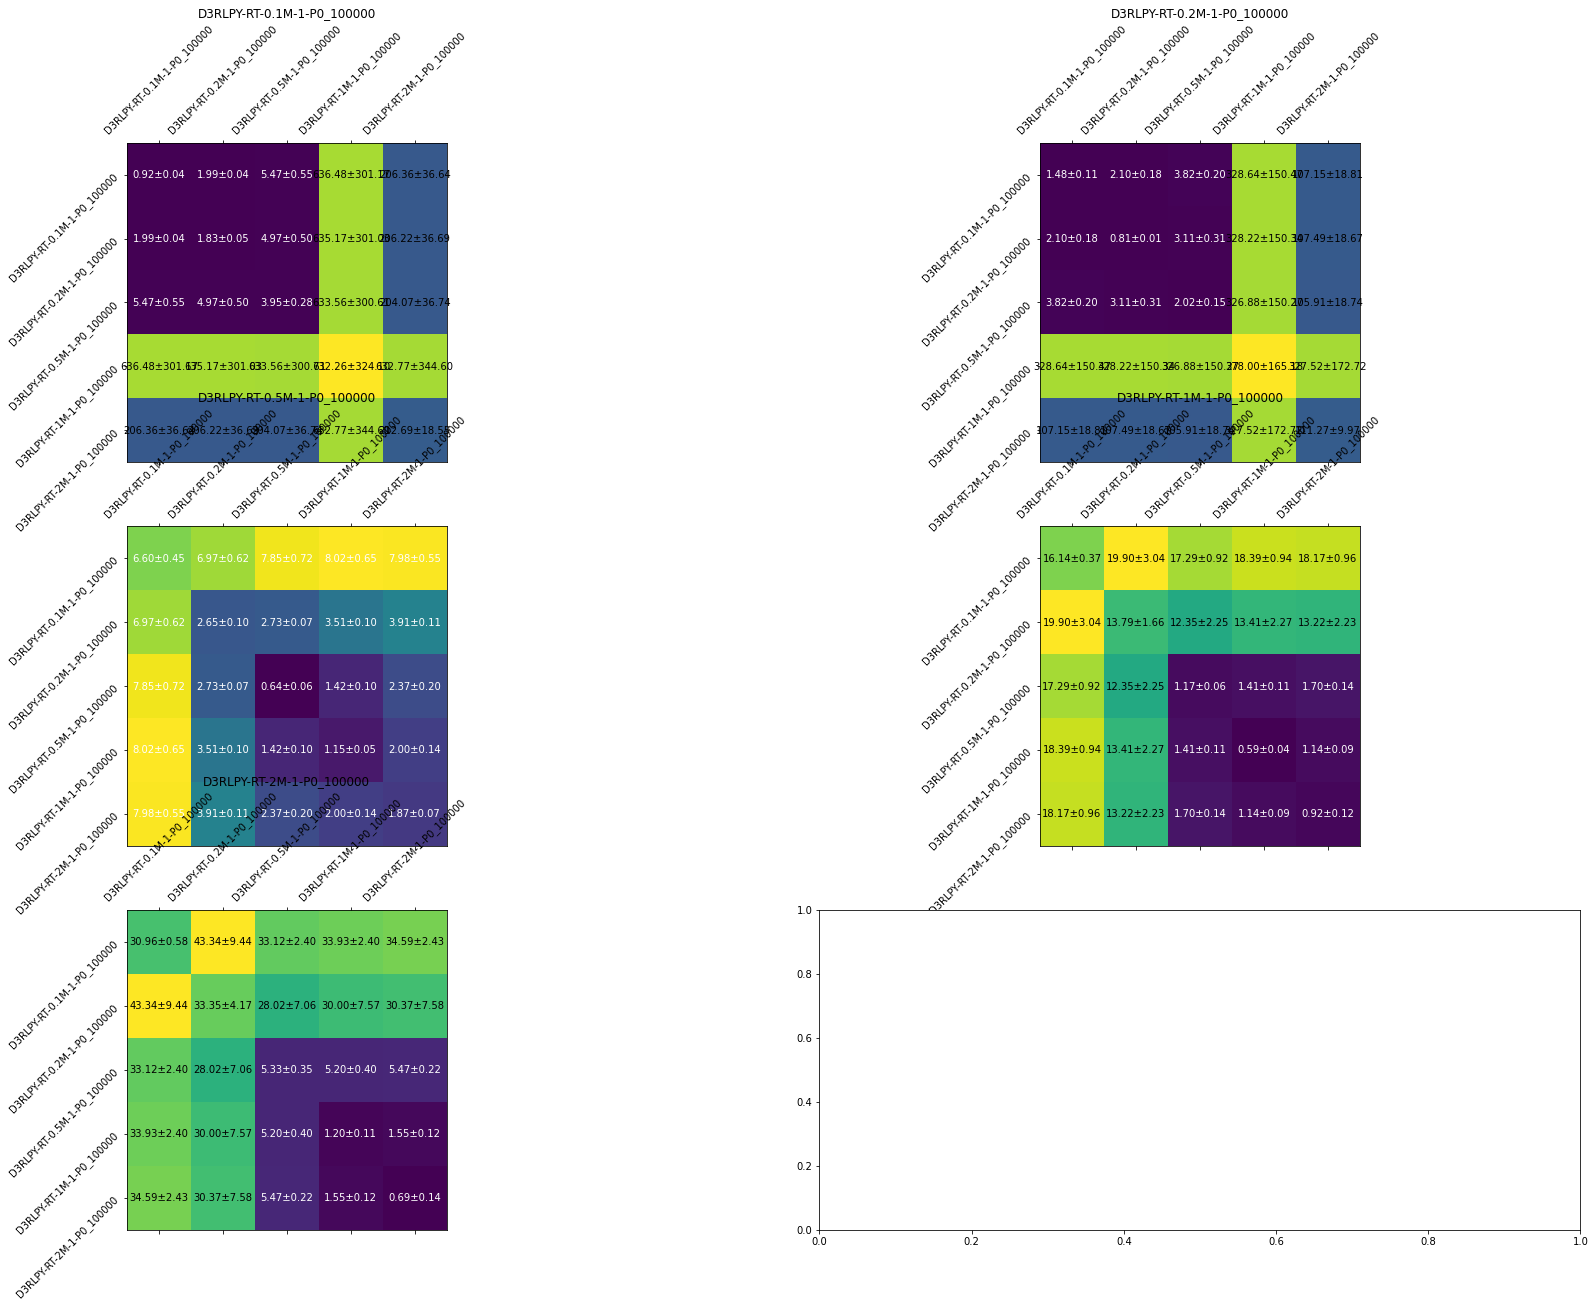

In [ ]:
display_distances(d3rlpy_1_experiments, d3rlpy_1_wd_mean, d3rlpy_1_wd_std, shape=(3,2))

# MP4-PAP8

In [ ]:
mp4_pap8_no_rex_experiments = {
    'D3RLPY-MP4-P0-3' : ['MP401', 'MP402', 'MP403'],
    'D3RLPY-MP4-P1-4' : ['MP413', 'MP414', 'MP415'],
    'D3RLPY-PAP8-P0-3': ['MP425', 'MP426', 'MP427'],
    'D3RLPY-PAP8-P1-4': ['MP437', 'MP438', 'MP439'],
}

mp4_pap8_rex_10_experiments = {
    'D3RLPY-MP4-P0-3' : ['MP410', 'MP411', 'MP412'],
    'D3RLPY-MP4-P1-4' : ['MP422', 'MP423', 'MP424'],
    'D3RLPY-PAP8-P0-3': ['MP434', 'MP435', 'MP436'],
    'D3RLPY-PAP8-P1-4': ['MP446', 'MP447', 'MP448'],
}

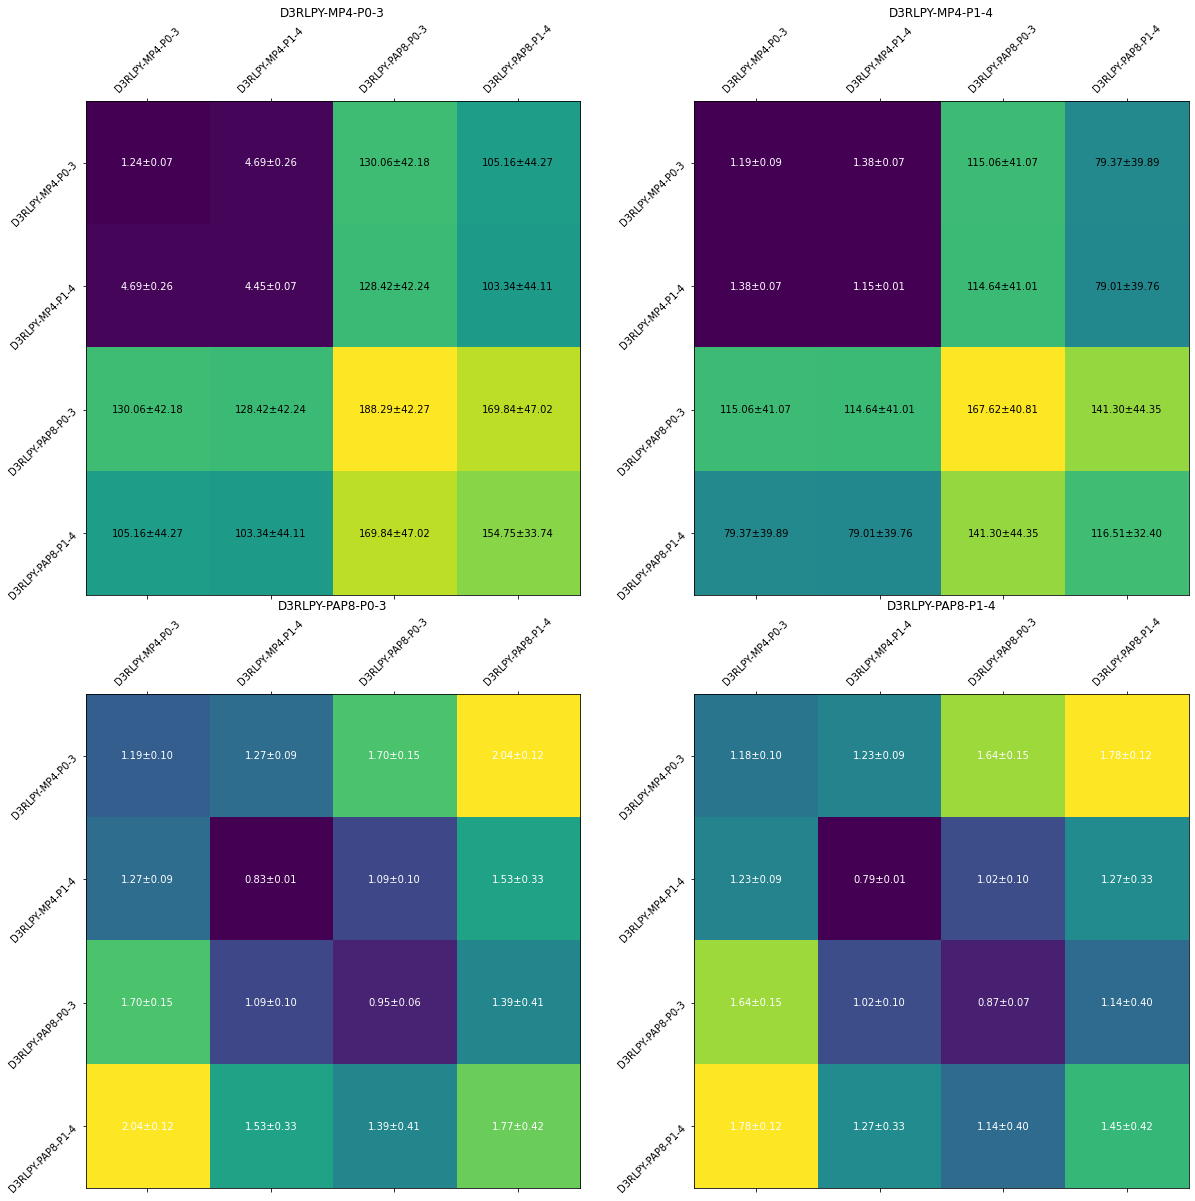

In [ ]:
mp4_pap8_no_rex_wd_mean, mp4_pap8_no_rex_wd_std = experiment_collection_distances(mp4_pap8_no_rex_experiments)
display_distances(mp4_pap8_no_rex_experiments, mp4_pap8_no_rex_wd_mean, mp4_pap8_no_rex_wd_std)

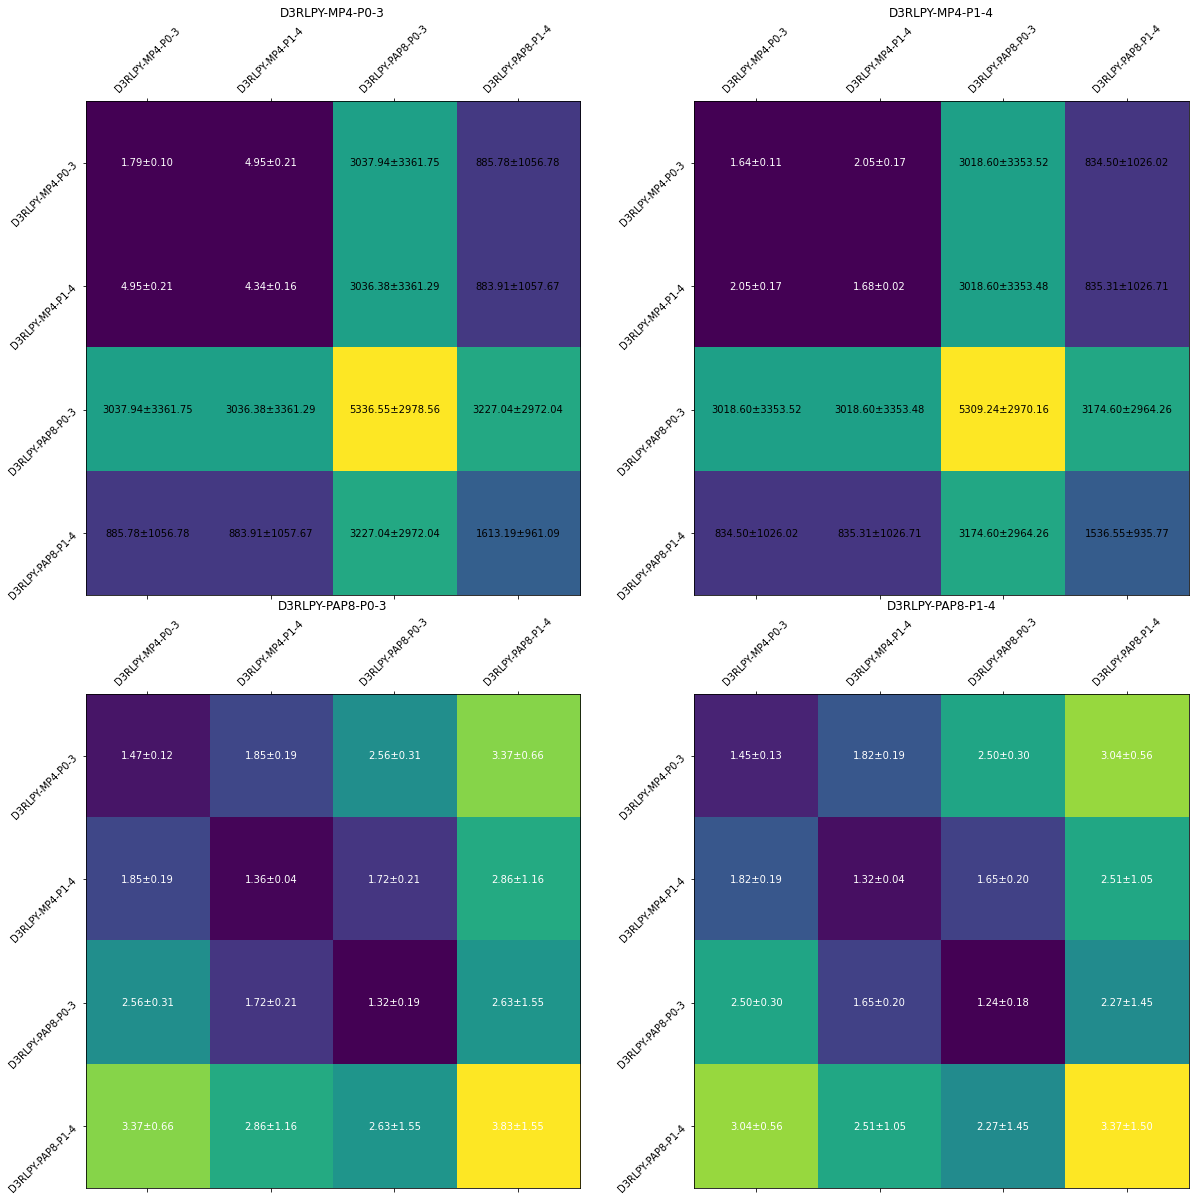

In [ ]:
mp4_pap8_rex_10_wd_mean, mp4_pap8_rex_10_wd_std = experiment_collection_distances(mp4_pap8_rex_10_experiments)
display_distances(mp4_pap8_rex_10_experiments, mp4_pap8_rex_10_wd_mean, mp4_pap8_rex_10_wd_std)